## TODO

* Función de acumulación
* Generación de variables aleatorias:
* * Elijo valores en eje y de forma uniforme
* * Obtengo punto más cercano en funcion de acumulacion
* * Veo su componente en X
* * Muestro histograma de puntos sampleados


# Función de Acumulación

**Objetivos:**

* Partiendo de Densidad de una Normal
* Obtener Función de Acumulación

**Observación:**

* Discretizo valores para representar áreas como rectángulos.
* Simil a integral de Riemann
  
  *Wiki:* [*Integral de Riemann: Interpretación geométrica*](https://es.wikipedia.org/wiki/Integraci%C3%B3n_de_Riemann#Interpretaci%C3%B3n_geom%C3%A9trica)
  
  ![Riemann_integral_regular.gif](https://upload.wikimedia.org/wikipedia/commons/2/28/Riemann_integral_regular.gif)

In [142]:
X_data <- seq(-4, 4, 0.125)
Y_data <- dnorm(X_data) 
data   <- data.frame(X_data, Y_data)
head(data)

X_data,Y_data
"-4,000","0,0001338302"
"-3,875","0,0002189316"
"-3,750","0,0003525957"
"-3,625","0,0005590615"
"-3,500","0,0008726827"
"-3,375","0,0013411189"


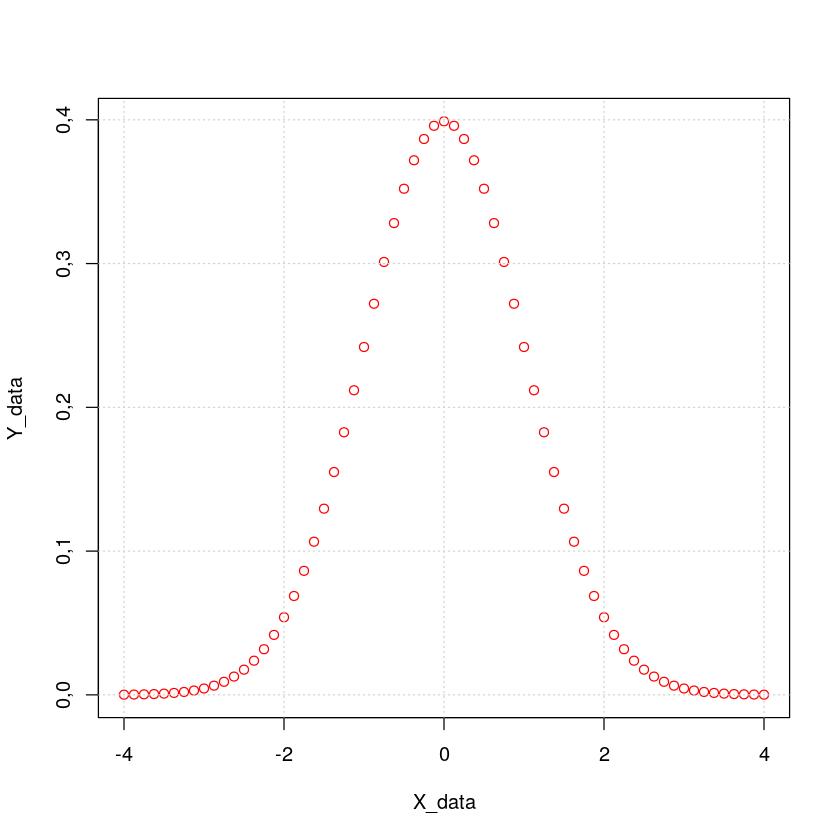

In [143]:
plot(data, col='red')
grid()

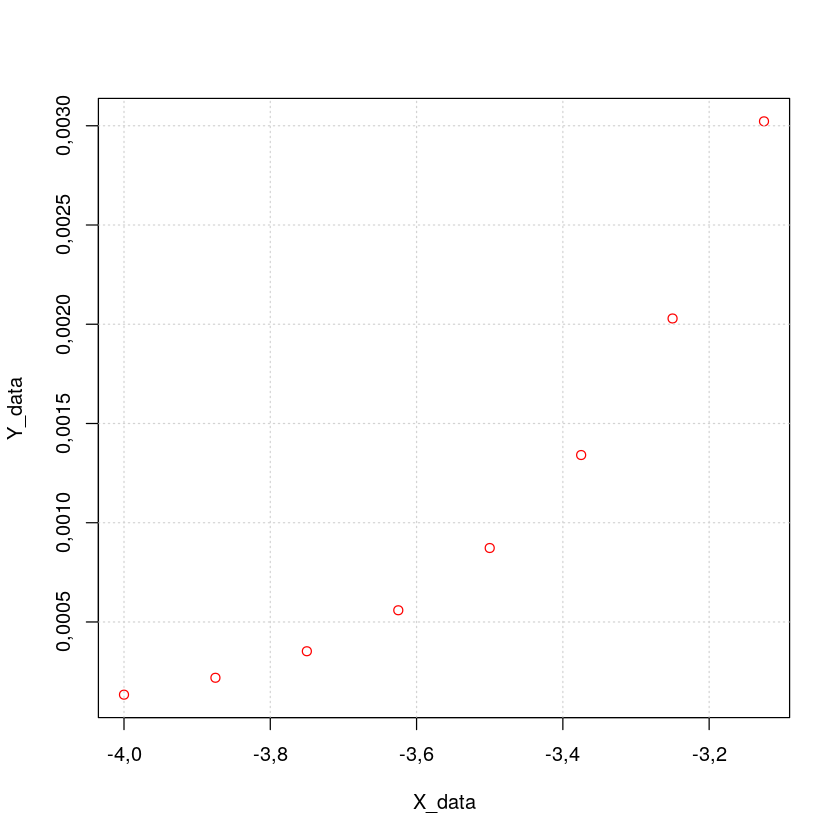

In [144]:
plot(head(data, 8), col='red')
grid()

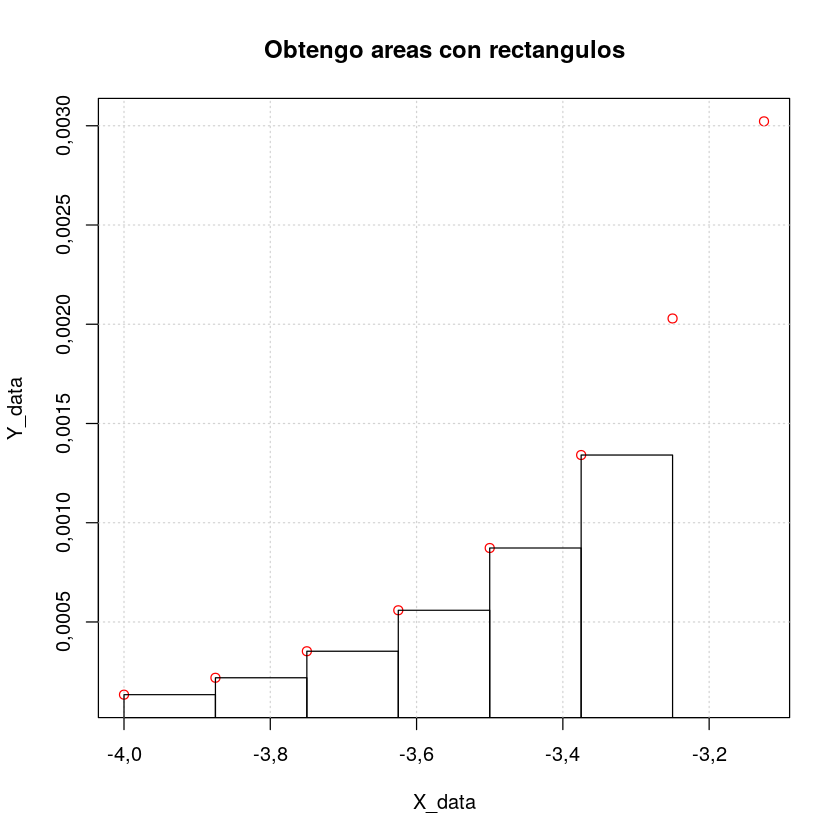

In [145]:
plot(head(data, 8), col='red')
grid()
title('Obtengo areas con rectangulos')
rect(xleft=data[1,1], ybottom=0, xright=data[2,1], ytop=data[1,2])
rect(xleft=data[2,1], ybottom=0, xright=data[3,1], ytop=data[2,2])
rect(xleft=data[3,1], ybottom=0, xright=data[4,1], ytop=data[3,2])
rect(xleft=data[4,1], ybottom=0, xright=data[5,1], ytop=data[4,2])
rect(xleft=data[5,1], ybottom=0, xright=data[6,1], ytop=data[5,2])
rect(xleft=data[6,1], ybottom=0, xright=data[7,1], ytop=data[6,2])

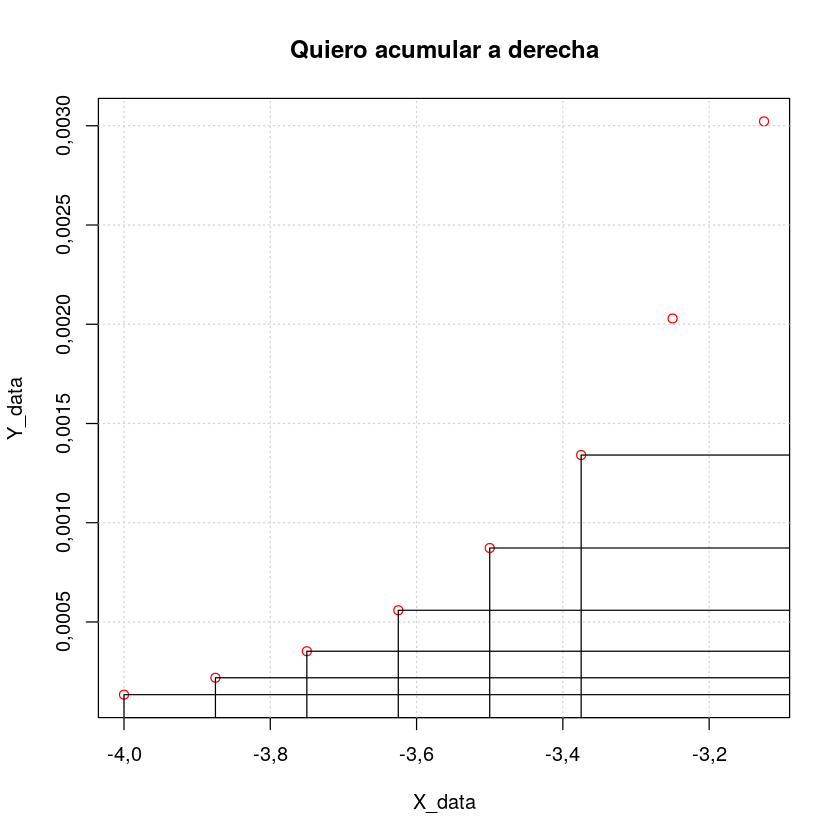

In [146]:
plot(head(data, 8), col='red')
grid()
title('Quiero acumular a derecha')
rect(xleft=data[1,1], ybottom=0, xright=4, ytop=data[1,2])
rect(xleft=data[2,1], ybottom=0, xright=4, ytop=data[2,2])
rect(xleft=data[3,1], ybottom=0, xright=4, ytop=data[3,2])
rect(xleft=data[4,1], ybottom=0, xright=4, ytop=data[4,2])
rect(xleft=data[5,1], ybottom=0, xright=4, ytop=data[5,2])
rect(xleft=data[6,1], ybottom=0, xright=4, ytop=data[6,2])

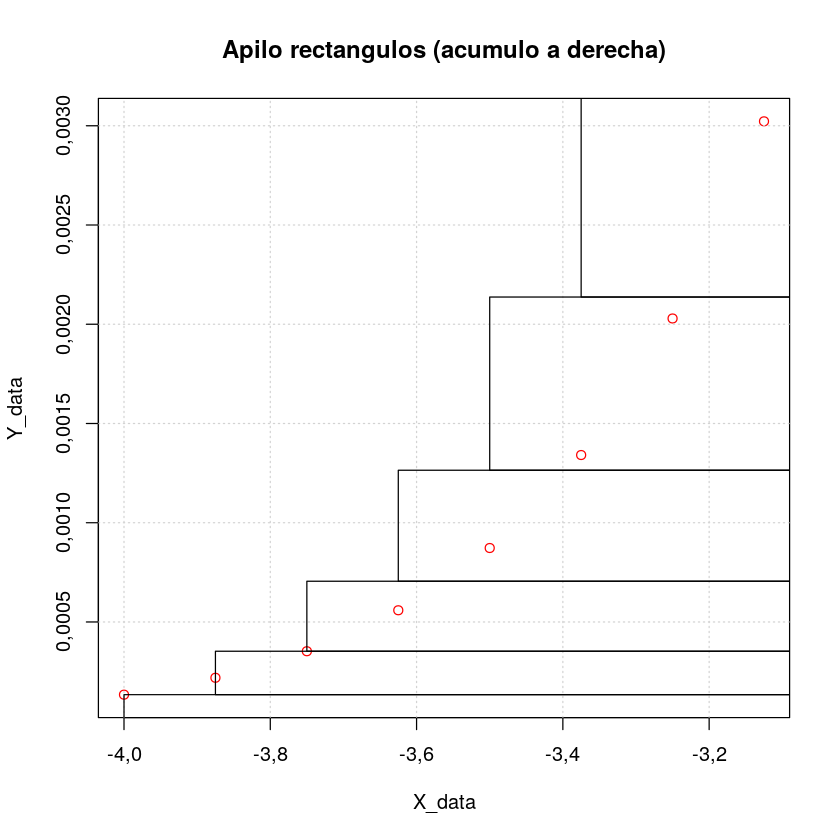

In [147]:
plot(head(data, 8), col='red')
grid()
title('Apilo rectangulos (acumulo a derecha)')
rect(xleft=data[1,1], ybottom=0, xright=4, ytop=data[1,2])
rect(xleft=data[2,1], ybottom=sum(data[1,2]), xright=4, ytop=sum(data[1:2,2]))
rect(xleft=data[3,1], ybottom=sum(data[1:2,2]), xright=4, ytop=sum(data[1:3,2]))
rect(xleft=data[4,1], ybottom=sum(data[1:3,2]), xright=4, ytop=sum(data[1:4,2]))
rect(xleft=data[5,1], ybottom=sum(data[1:4,2]), xright=4, ytop=sum(data[1:5,2]))
rect(xleft=data[6,1], ybottom=sum(data[1:5,2]), xright=4, ytop=sum(data[1:6,2]))

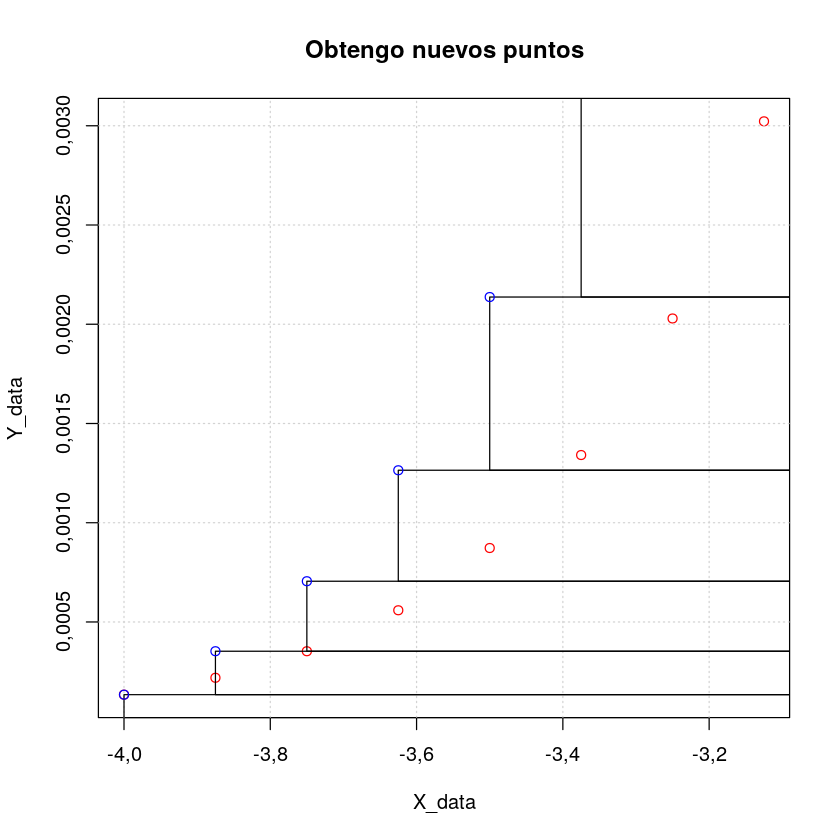

In [148]:
plot(head(data, 8), col='red')
grid()
title('Obtengo nuevos puntos')
rect(xleft=data[1,1], ybottom=0, xright=4, ytop=data[1,2])
p_i <- c(data[1,1], sum(data[1:1,2]))
points(p_i[1], p_i[2], col='blue')

rect(xleft=data[2,1], ybottom=sum(data[1,2]), xright=4, ytop=sum(data[1:2,2]))
p_i <- c(data[2,1], sum(data[1:2,2]))
points(p_i[1], p_i[2], col='blue')

rect(xleft=data[3,1], ybottom=sum(data[1:2,2]), xright=4, ytop=sum(data[1:3,2]))
p_i <- c(data[3,1], sum(data[1:3,2]))
points(p_i[1], p_i[2], col='blue')

rect(xleft=data[4,1], ybottom=sum(data[1:3,2]), xright=4, ytop=sum(data[1:4,2]))
p_i <- c(data[4,1], sum(data[1:4,2]))
points(p_i[1], p_i[2], col='blue')

rect(xleft=data[5,1], ybottom=sum(data[1:4,2]), xright=4, ytop=sum(data[1:5,2]))
p_i <- c(data[5,1], sum(data[1:5,2]))
points(p_i[1], p_i[2], col='blue')

rect(xleft=data[6,1], ybottom=sum(data[1:5,2]), xright=4, ytop=sum(data[1:6,2]))
p_i <- c(data[6,1], sum(data[1:6,2]))
points(p_i[1], p_i[2], col='blue')

### Función de acumulación

**Notar:** Valores máximos de la función

In [188]:
acum_data <- data
for(i in c(2:nrow(acum_data))){
    acum_data[i,2] = acum_data[i,2] + acum_data[i-1,2]
}

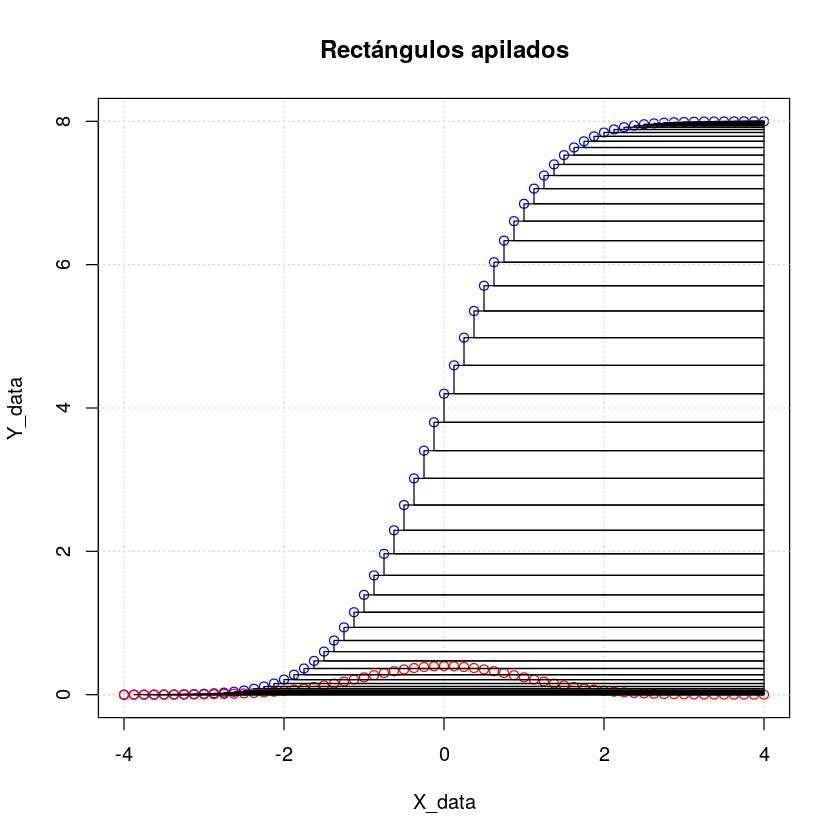

In [189]:
plot(acum_data, col='blue')
grid()
points(data, col='red')
title('Rectángulos apilados')

for(i in c(2:nrow(acum_data))){
    rect(xleft=data[i,1], ybottom=acum_data[i-1,2], xright=4, ytop=acum_data[i,2])
}

### Normalizo (divido por 8 la acumulada) y comparo con generada por R (verde)

#### Obs:

Al haber usado un step size de 0.125 (1/8), necesito dividir por 8 para contemplar el error de área acumulado.

De haber usado step size 0.25 (1/4), tendría que haber dividido por 4.

#### Duda:
Por qué la densidad queda POR ENCIMA de la de acumulación entre -2 y -1 ?

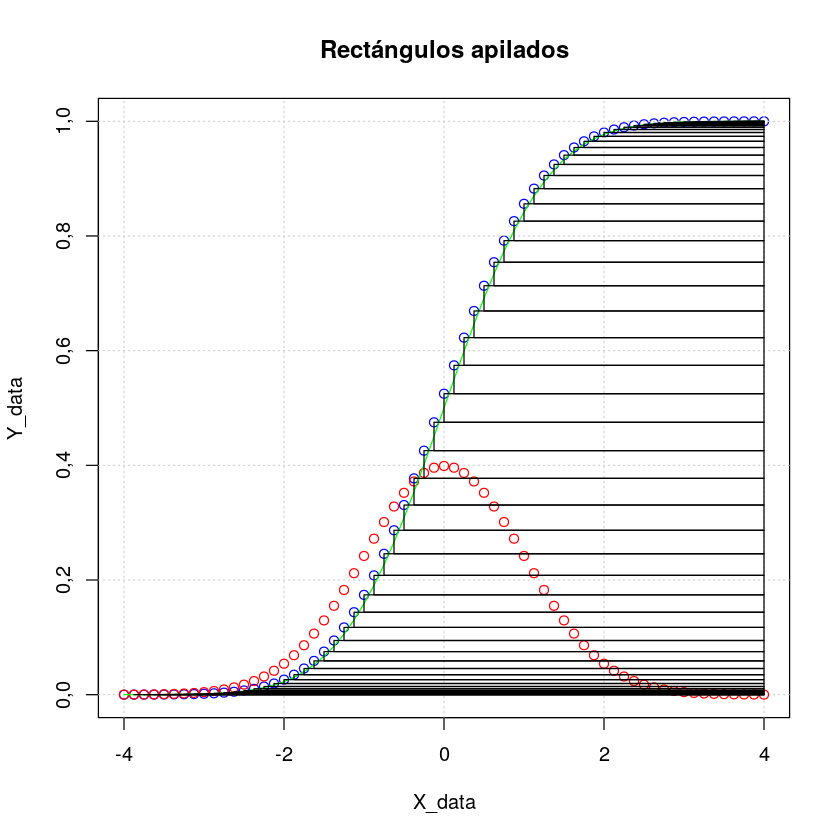

In [187]:
norm_acum_data = acum_data
for(i in c(1:nrow(acum_data))){
    norm_acum_data[i,2] = acum_data[i,2]/8
}

plot(norm_acum_data, col='blue')
grid()
points(data, col='red')
lines(seq(-4,4,0.125),pnorm(seq(-4,4,0.125)),col='green')
title('Rectángulos apilados')

for(i in c(2:nrow(norm_acum_data))){
    rect(xleft=data[i,1], ybottom=norm_acum_data[i-1,2], xright=4, ytop=norm_acum_data[i,2])
}

**Notar** que entre -2 y 2 del eje X ocurre **casi todo el crecimiento en Y** de la función de acumulación.

**Observar** cómo se corresponde con **el área** de la función de densidad (en rojo).

## El plan: 

A partir de valores **uniformemente aleatorios** entre 0 y 1 obtener valores aleatorios **con distribución Normal**

**Necesito:**

* Inversa de función de acumulación 
* * Puedo obtenerla a partir de lo anterior

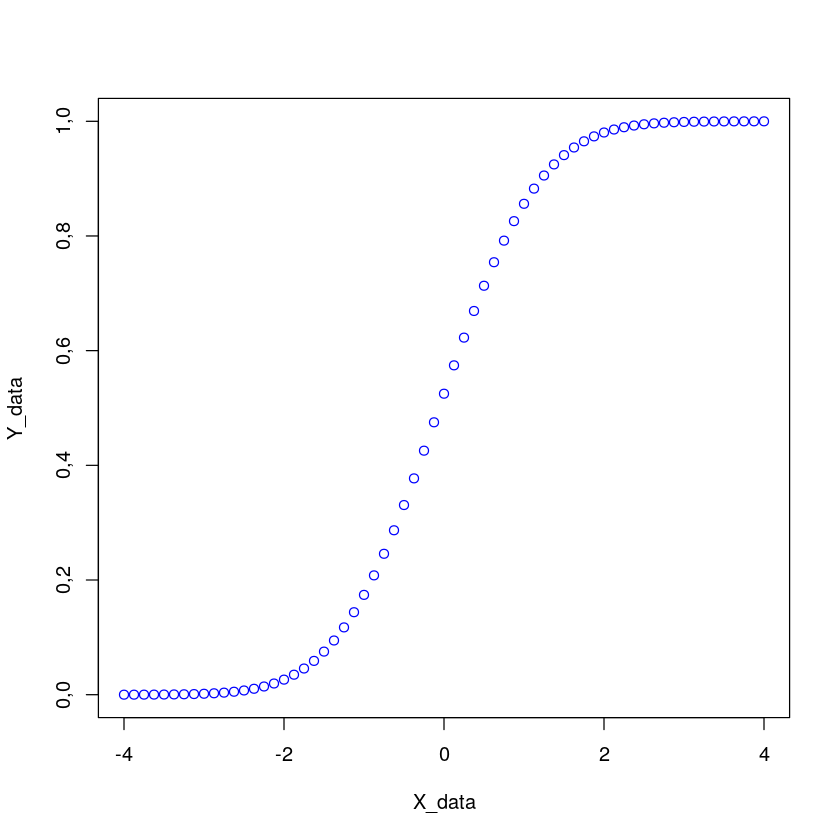

In [190]:
plot(norm_acum_data, col='blue')

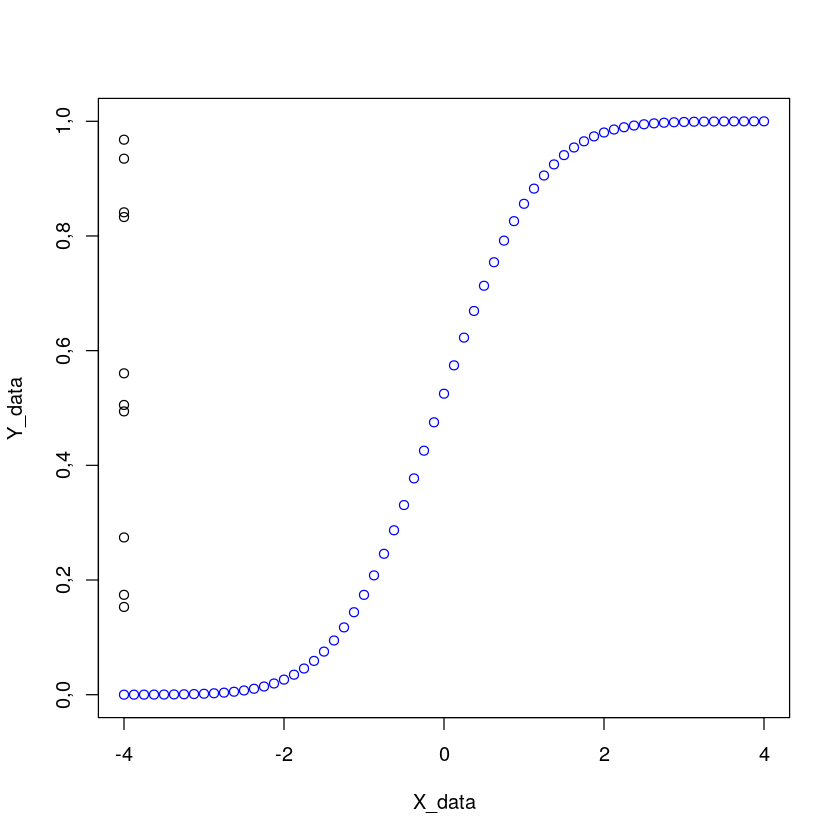

In [198]:
plot(norm_acum_data, col='blue')
points(rep(-4,10), runif(10))

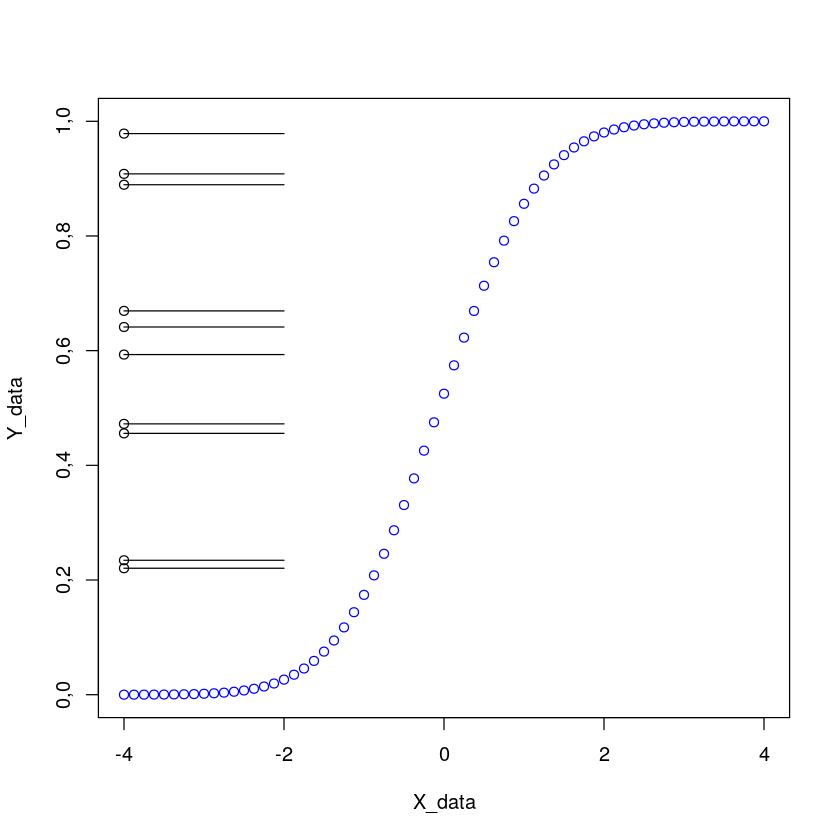

In [211]:
plot(norm_acum_data, col='blue')
random_points <- runif(10)
points(rep(-4,10), random_points)
segments(x0=rep(-4,10), y0=random_points,
         x1=-2, y1=random_points)

In [224]:
idx <- which.min(abs(0.4-norm_acum_data[,2]))
norm_acum_data[idx,]

,X_data,Y_data
30,"-0,375","0,3772289"


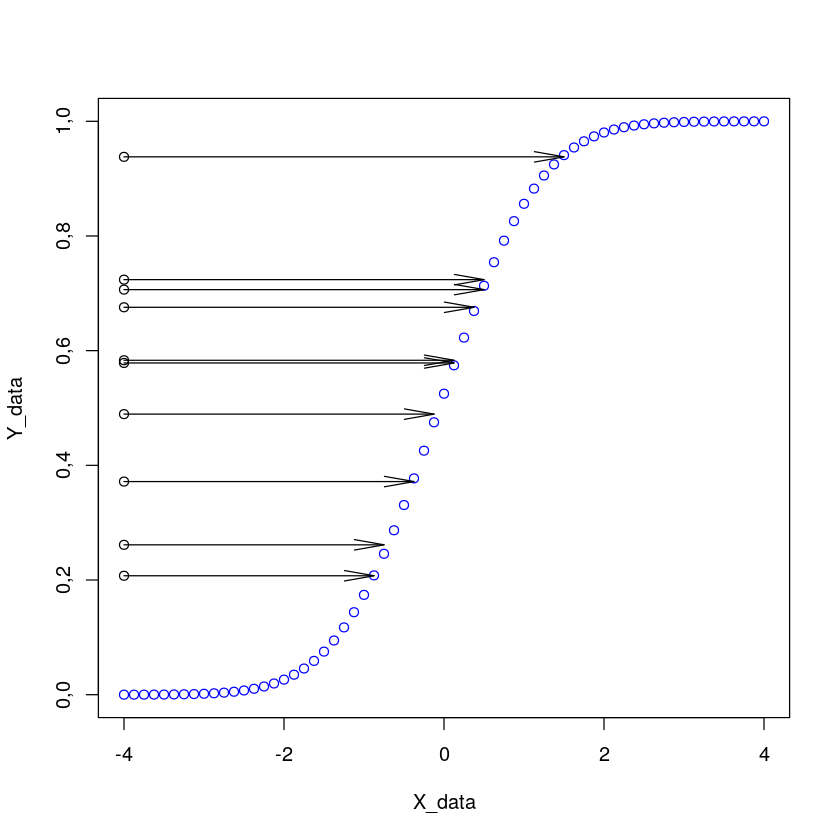

In [268]:
plot(norm_acum_data, col='blue')
random_points <- runif(10)
points(rep(-4,10), random_points)

for(i in c(1:10)){
    idx <- which.min(abs(random_points[i]-norm_acum_data[,2]))
    nearest <- norm_acum_data[idx,1]
    arrows(x0=-4, y0=random_points[i],
           x1=nearest, y1=random_points[i], angle=10)
}


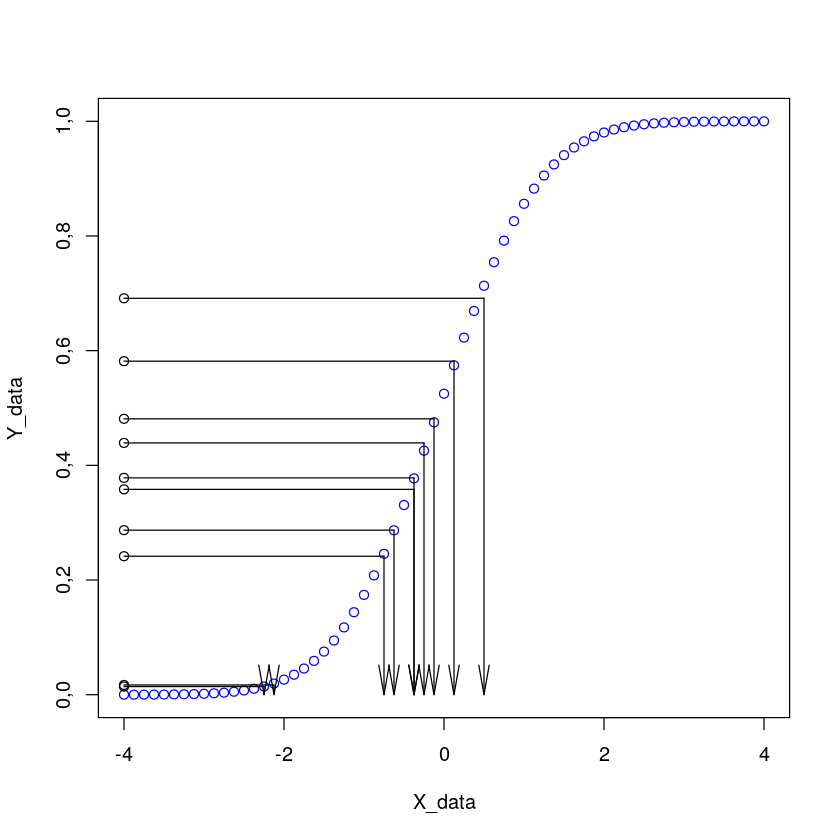

In [282]:
plot(norm_acum_data, col='blue')
random_points <- runif(10)
points(rep(-4,10), random_points)

for(i in c(1:10)){
    idx <- which.min(abs(random_points[i]-norm_acum_data[,2]))
    nearest <- norm_acum_data[idx,1]
    segments(x0=-4, y0=random_points[i],
             x1=nearest, y1=random_points[i])
    #vertical
    arrows(x0=nearest, y0=random_points[i],
             x1=nearest, y1=0, angle=10)
}

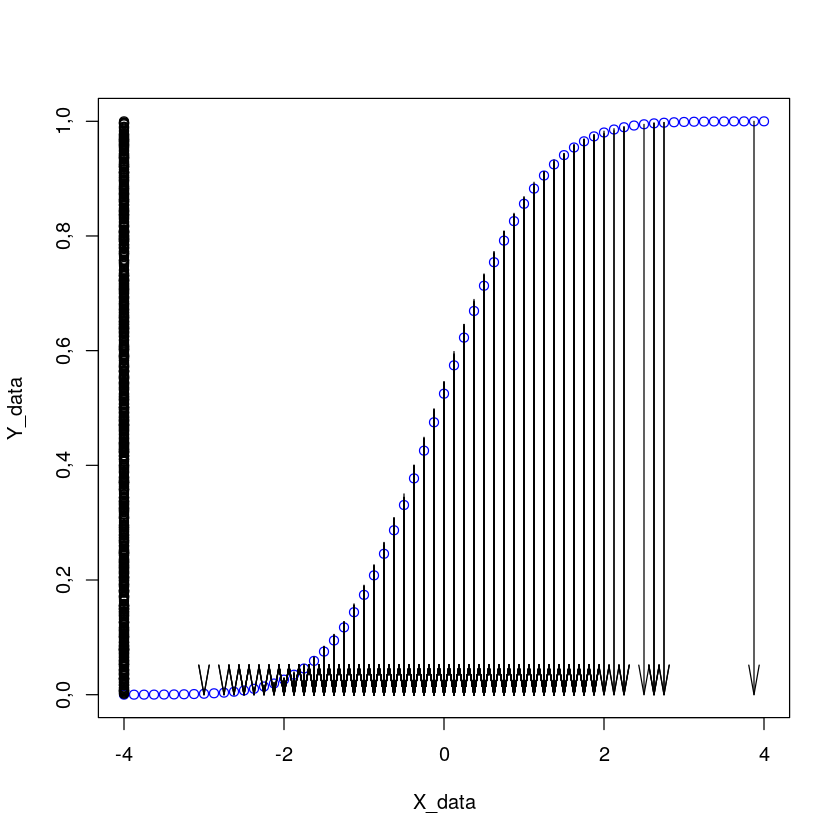

In [294]:
plot(norm_acum_data, col='blue')
random_points <- runif(1000)
genera_points <- rep(0,1000)
points(rep(-4,1000), random_points)

for(i in c(1:1000)){
    idx <- which.min(abs(random_points[i]-norm_acum_data[,2]))
    nearest <- norm_acum_data[idx,1]
    #segments(x0=-4, y0=random_points[i],
    #         x1=nearest, y1=random_points[i])
    #vertical
    arrows(x0=nearest, y0=random_points[i],
           x1=nearest, y1=0, angle=10)
    genera_points[i] <- nearest
}


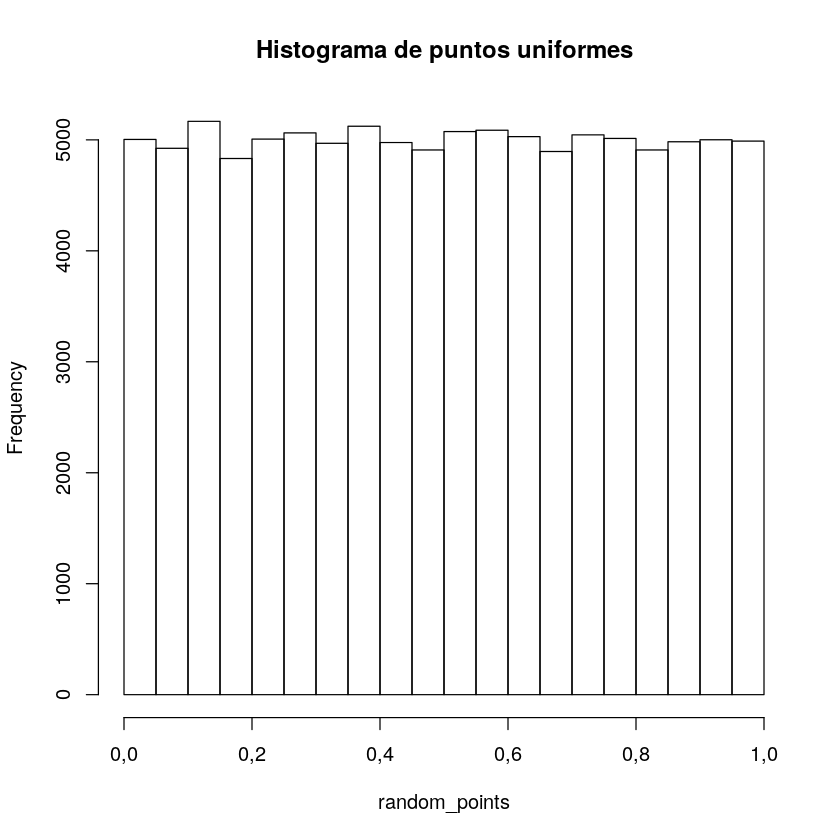

In [305]:
hist(random_points, main=NULL)
title('Histograma de puntos uniformes')

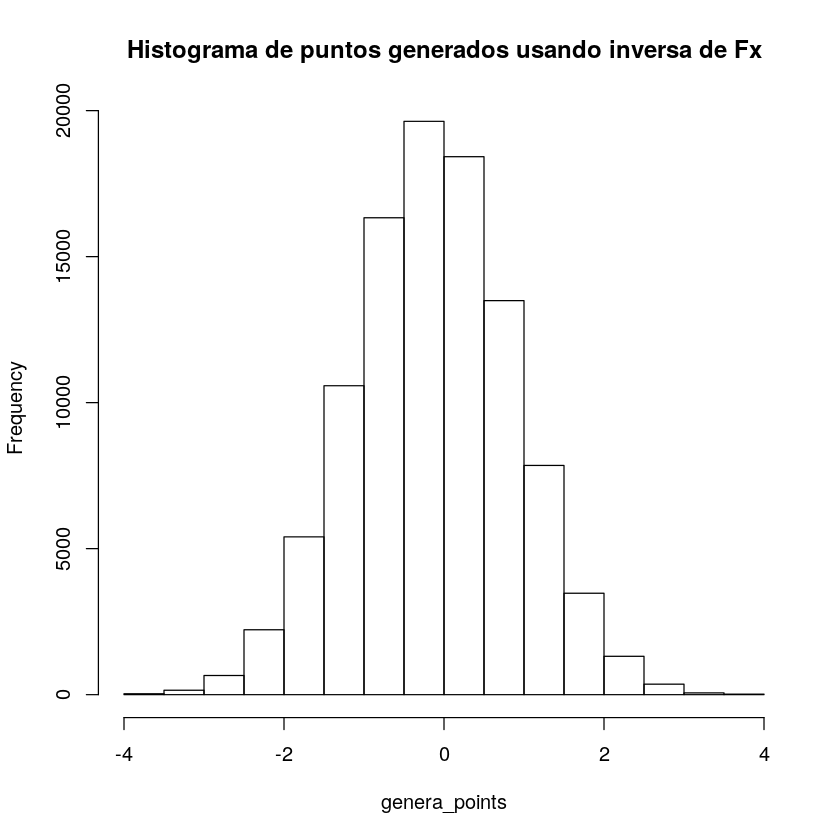

In [306]:
hist(genera_points, main=NULL)
title('Histograma de puntos generados usando inversa de Fx')

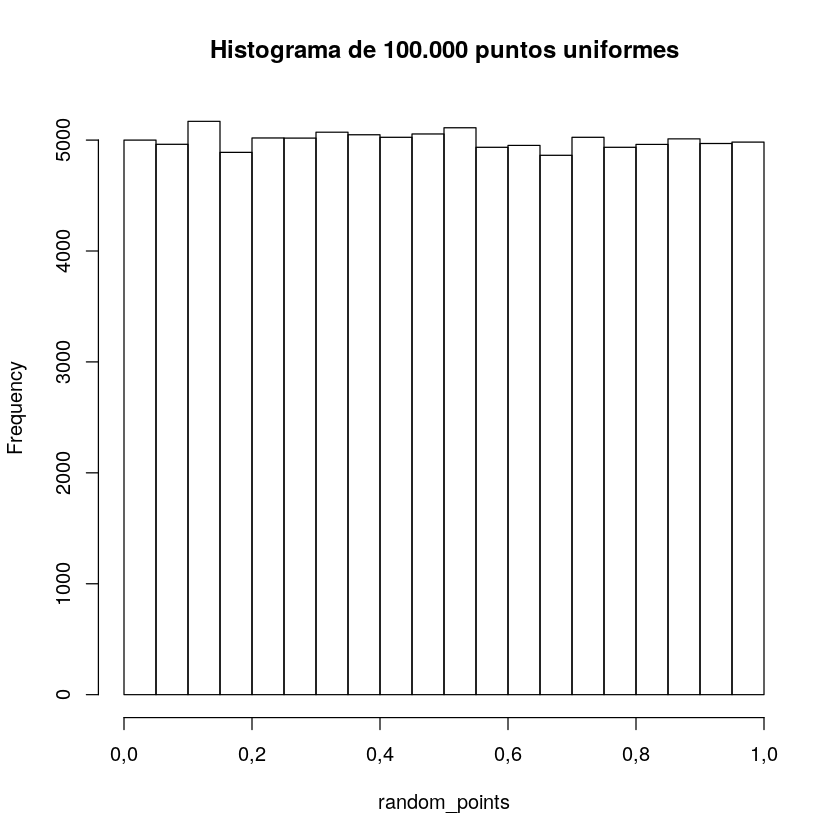

In [307]:
#plot(norm_acum_data, col='blue')
random_points <- runif(100000)
genera_points <- rep(0,100000)
#points(rep(-4,100000), random_points)

for(i in c(1:100000)){
    idx <- which.min(abs(random_points[i]-norm_acum_data[,2]))
    nearest <- norm_acum_data[idx,1]
    #segments(x0=-4, y0=random_points[i],
    #         x1=nearest, y1=random_points[i])
    #vertical
    #arrows(x0=nearest, y0=random_points[i],
    #       x1=nearest, y1=0, angle=10)
    genera_points[i] <- nearest
}
hist(random_points, main=NULL)
title('Histograma de 100.000 puntos uniformes')

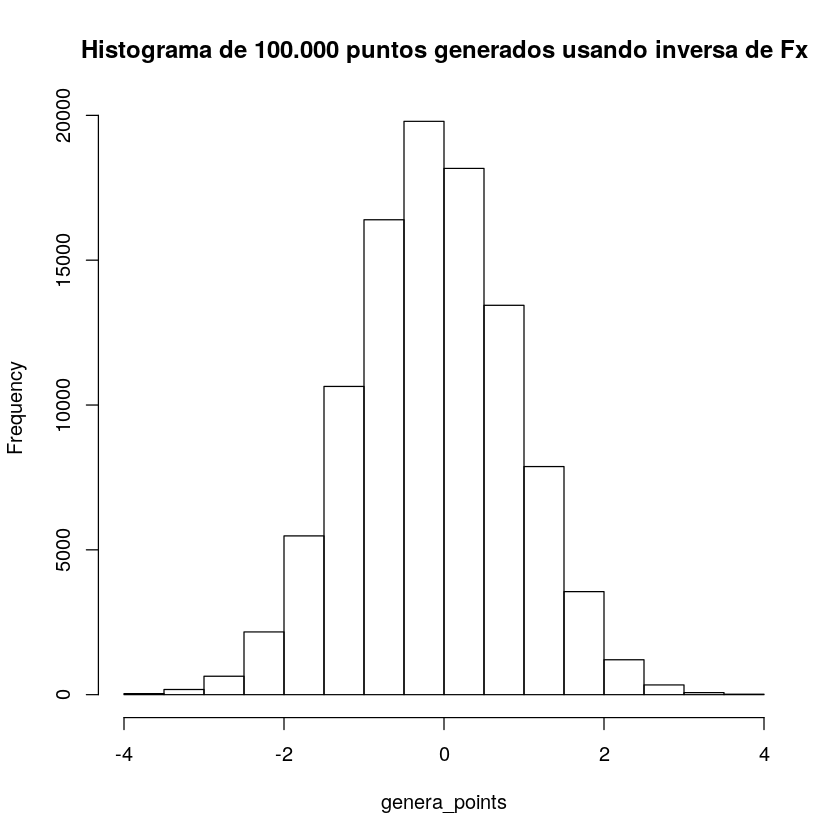

In [315]:
hist(genera_points, main=NULL)
title('Histograma de 100.000 puntos generados usando inversa de Fx')